**Evaluation Finale Programmation 2**
_______________________________________________________________
Presente par: **Ali Naim** et **Camilo Quintero**
_______________________________________________________________
Projet Netflix

Dataset : https://www.kaggle.com/datasets/shivamb/netflix-shows

**Etape 1:** Importation et verification du Dataset

**Etape 2:** Nettoyage (cleaning)

**Etape 3:** Visualisation 

_______________________________________________________________

In [23]:
!pip install missingno
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip (22.0 MB)


In [24]:
#---------------------------------#
#   Importation des librairies    #
#---------------------------------#

import numpy as np # Librarie pour fonctions math.
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # librairie pour les graphiques  
import matplotlib.pyplot as plt #librarie pour les graphiques
import plotly.graph_objs as go  ##librarie pour les graphiques
import plotly as py             #librarie pour les graphiques
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot#library pour les graphiques
import io #librairie pour l'importation de fichier
from google.colab import files  # librairie pour l'importation de fichier
import missingno as msno #librairie pour visualiser les valeurs nulles dans les colonnes

________________________________________________

**Etape 1 : Importation et Verification du Dataset**
________________________________________________

In [25]:
uploaded = files.upload()
data_or= pd.read_csv(io.BytesIO(uploaded['netflix_titles.csv']))
data = data_or.copy()

Saving netflix_titles.csv to netflix_titles (1).csv


In [26]:
print(data.shape)
data.head()

(8807, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [27]:
# on verifie s'il y a des valeurs nulles dans nos donnees
data.isnull().values.any()

True

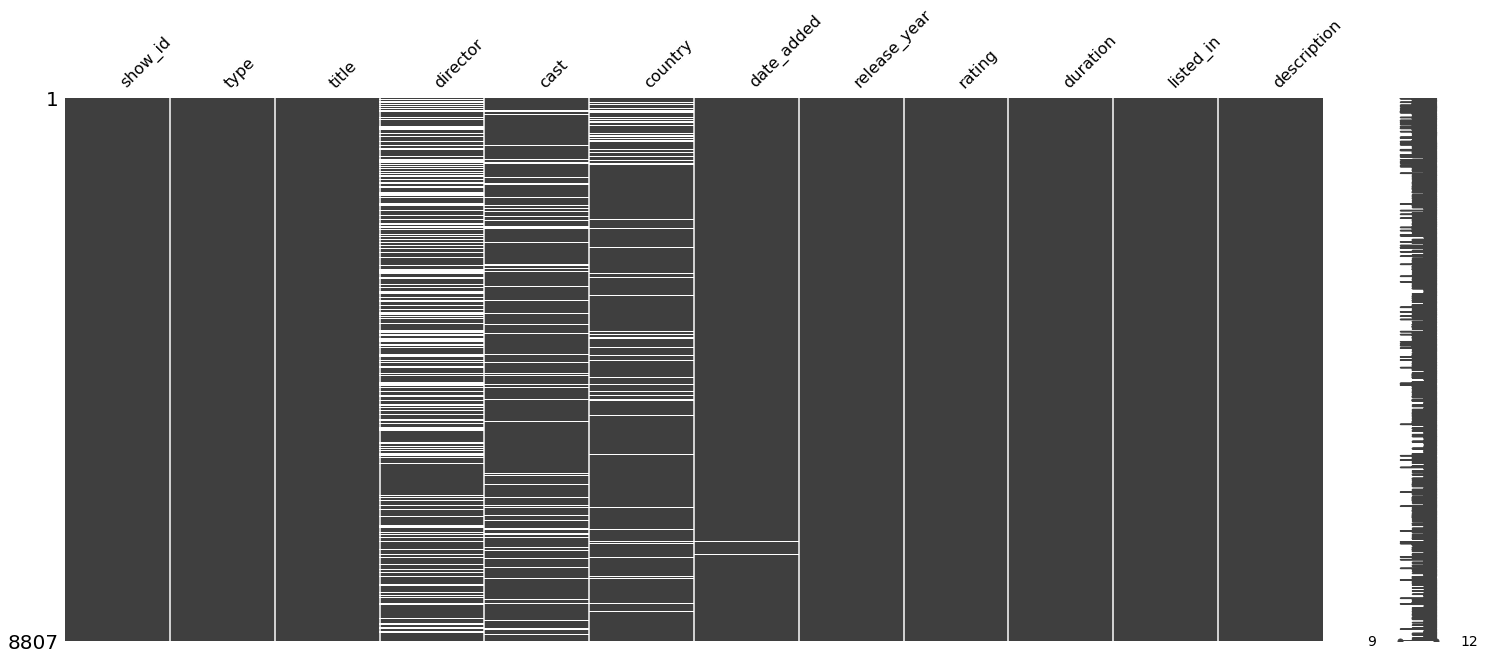

In [28]:
#Graphique qui montre les colonnes avec des valeurs nulles
msno.matrix(data)

In [29]:
# on identifie le nombre de valeurs null par colonne
print(data.isnull().sum())

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [30]:
# on identifie le pourcentage de valeurs null par colonne
(data.isnull().sum()/len(data))*100

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

In [31]:
# on verifie s'il y a des valeurs dupliques dans le dataset
data.duplicated().sum() 

0

___________________________________

**Etape 2: Nettoyage (Cleaning)**

___________________________________

In [32]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [33]:
# Traitement de la colonne country: on remplace les valeurs nulles par le pays du "director" 
# quand il est disponible si non on met Non-disponible

data = data_or.copy()
df_temp = data[["director","country"]].dropna().drop_duplicates(subset='director') # On extrait le pays non-nul du director
df_temp.columns = ['director', 'director_country'] # On renomme les colonnes pour eviter le meme nom lors du merge
data = data.merge(df_temp, how='left', on='director') # On combine les 2 tables
print("poucentage originale des valeurs nulles : ",(data.country.isnull().sum()/len(data.country))*100)
data['country'] = np.where(data.country.isna(), data.director_country, data.country) # On remplace les valeurs nulles du pays par le pays du directeur 
print("poucentage des valeurs nulles apres 1er traitement : ",(data.country.isnull().sum()/len(data.country))*100) # On reussit à remplacer 1.68% avec cette méthodologie
data['country'] = data['country'].fillna('Pays Non-Disponible') # On remplace le reste des valeurs nulles par Pays Non-Disponible
print("poucentage des valeurs nulles apres traitement final :",(data.country.isnull().sum()/len(data.country))*100) # Toutes les valeurs nulles sont remplacées
data.drop('director_country', axis=1, inplace=True)

poucentage originale des valeurs nulles :  9.435676166685592
poucentage des valeurs nulles apres 1er traitement :  7.755194731463609
poucentage des valeurs nulles apres traitement final : 0.0


In [34]:
# On remplace les valeurs nulles des autres colonnes par une valeur standard
data['director'] = data['director'].fillna('Directeur Non-Disponible')
data['cast'] = data['cast'].fillna('Casting Non-Disponible')
data['date_added'] = data['date_added'].fillna('Date Ajout Non-Disponible')
data['rating'] = data['rating'].fillna('Rating Non-Disponible')
data['duration'] = data['duration'].fillna('Durée Non-Disponible')

In [35]:
# On s'assure qu'il n'y a plus de valeurs nulles
(data.isnull().sum()/len(data))*100

show_id         0.0
type            0.0
title           0.0
director        0.0
cast            0.0
country         0.0
date_added      0.0
release_year    0.0
rating          0.0
duration        0.0
listed_in       0.0
description     0.0
dtype: float64

____________________________________________________________________

**Etape 3 : Visualisation**
____________________________________________________________________

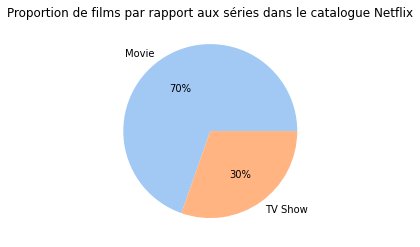

In [36]:
# Graphique 1: Proportion de films par rapport aux séries dans le catalogue Netflix
film_serie = data.groupby('type').show_id.count()
colors = sns.color_palette('pastel')[0:2]
plt.pie(film_serie, labels=film_serie.index, colors = colors, autopct='%.0f%%')
plt.title('Proportion de films par rapport aux séries dans le catalogue Netflix')
plt.show()

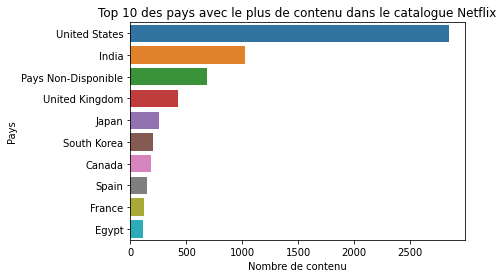

In [37]:
# Graphique 2: Top 10 des pays avec le plus de contenu dans le catalogue Netflix
contenu_pays = data.groupby('country').show_id.count().sort_values(ascending=False)
top10_contenu_pays = contenu_pays[:10]
sns.barplot(y=top10_contenu_pays.index, x= top10_contenu_pays.values, orient='h')
plt.title('Top 10 des pays avec le plus de contenu dans le catalogue Netflix')
plt.xlabel('Nombre de contenu')
plt.ylabel('Pays')
plt.show()

In [38]:
#Graphe 3:Carte interactive du nombre de contenus produits par pays sur Netflix
map_country = dict(
type = 'choropleth',
colorscale = 'rdbu',
locations = contenu_pays.index,
locationmode = "country names",
z = contenu_pays.values,
text = contenu_pays.index,
)
layout = dict(title = 'Carte interactive du nombre de contenus produits par pays sur Netflix')
chmap = go.Figure(data = map_country, layout = layout)
chmap.update_traces(showscale=False)
iplot(chmap)

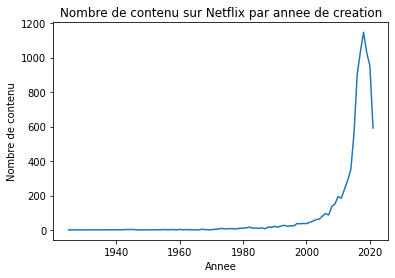

In [39]:
# Graphique 4: Line plot du nombre de contenu par annee de creation
contenu_annee = data.groupby('release_year').show_id.count()
sns.lineplot(x=contenu_annee.index, y= contenu_annee.values)
plt.title('Nombre de contenu sur Netflix par annee de creation')
plt.xlabel('Annee')
plt.ylabel('Nombre de contenu')
plt.show()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



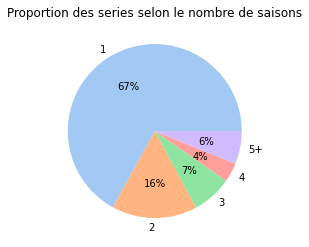

In [40]:
# Graphique 5: Analyse de la duree des series sur Netflix
duree_serie = data[data.type == 'TV Show'] #extraction des tv shows
duree_serie.duration = duree_serie.duration.str.split(' ').str[0].astype(int) #selection du nombre de saisons
duree_serie.duration = np.where(duree_serie.duration >= 5, '5+', duree_serie.duration) #remplacer les tv shows de 5 saisons et plus par la valeur 5+
duree_serie = duree_serie.groupby("duration").show_id.count() # le comptage par nombre de saissons
colors = sns.color_palette('pastel')[0:6]
plt.pie(duree_serie, labels=duree_serie.index, colors = colors, autopct='%.0f%%')
plt.title('Proportion des series selon le nombre de saisons')
plt.show()

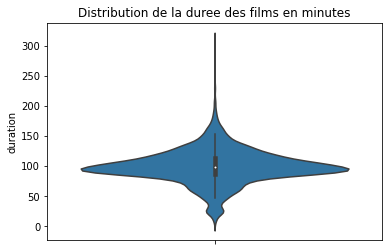

In [41]:
# Graphique 6: Analyse de la duree des films sur Netflix
duree_film = data[data.type == 'Movie'] #extraction de films
duree_film.duration = duree_film.duration.str.split(' ').str[0] #extraction de la valeurs numerique de la duree de films en minutes
duree_film.duration = pd.to_numeric(duree_film.duration, errors='coerce')
sns.violinplot(y = duree_film.duration)
plt.title('Distribution de la duree des films en minutes')
plt.show()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



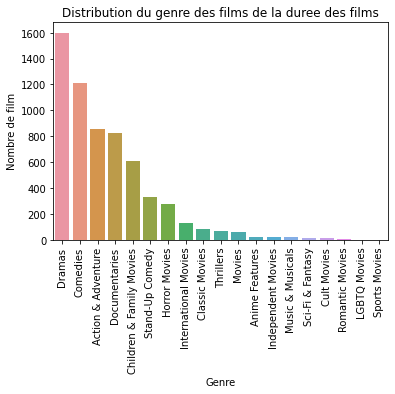

In [42]:
# Graphique 7: Analyse du premier genre des films
genre_film = data[data.type == 'Movie']  #extraction de films
genre_film.listed_in = genre_film.listed_in.str.split(',').str[0] #selection du premier genre de film
genre_film = genre_film.groupby('listed_in').show_id.count().sort_values(ascending=False) #comptage par genre
sns.barplot(x = genre_film.index, y= genre_film.values)
plt.title('Distribution du genre des films de la duree des films')
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Nombre de film')
plt.show()